<a href="https://colab.research.google.com/github/rks16/Python-new-/blob/main/DTTE_Colab_tutorial_14_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Perceptron and Gradient Descent
##Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

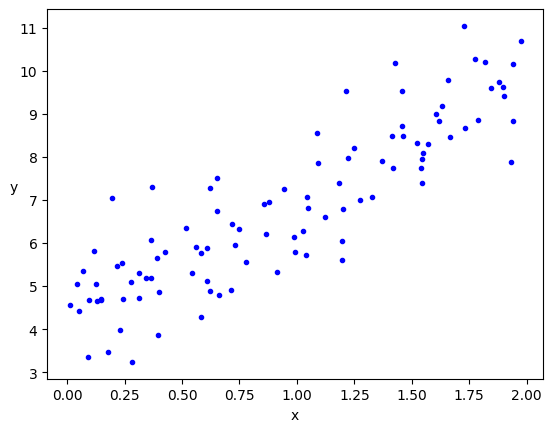

In [5]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [6]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [7]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [8]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

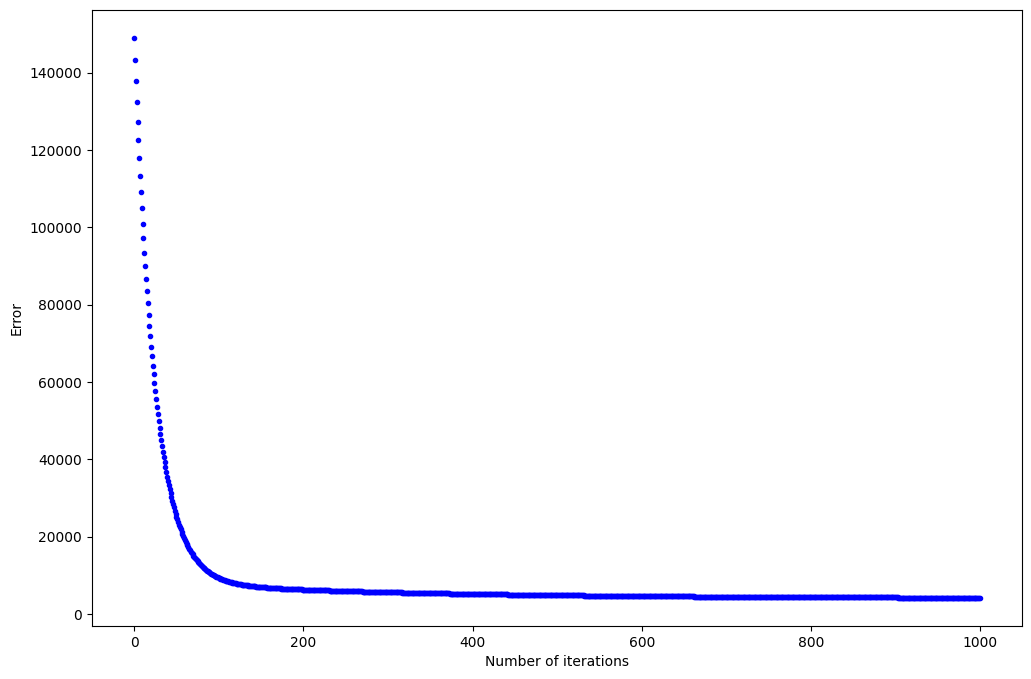

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

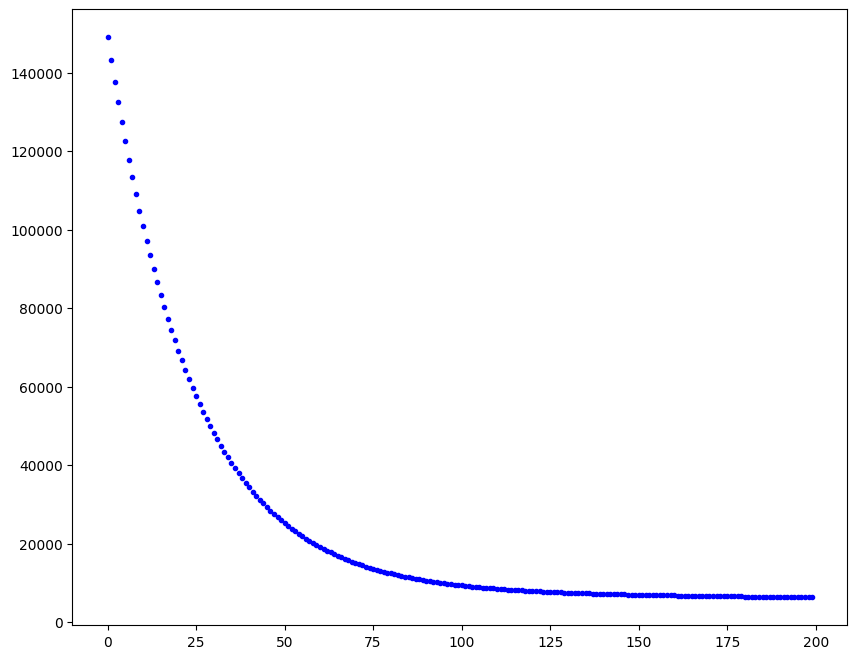

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [11]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [12]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


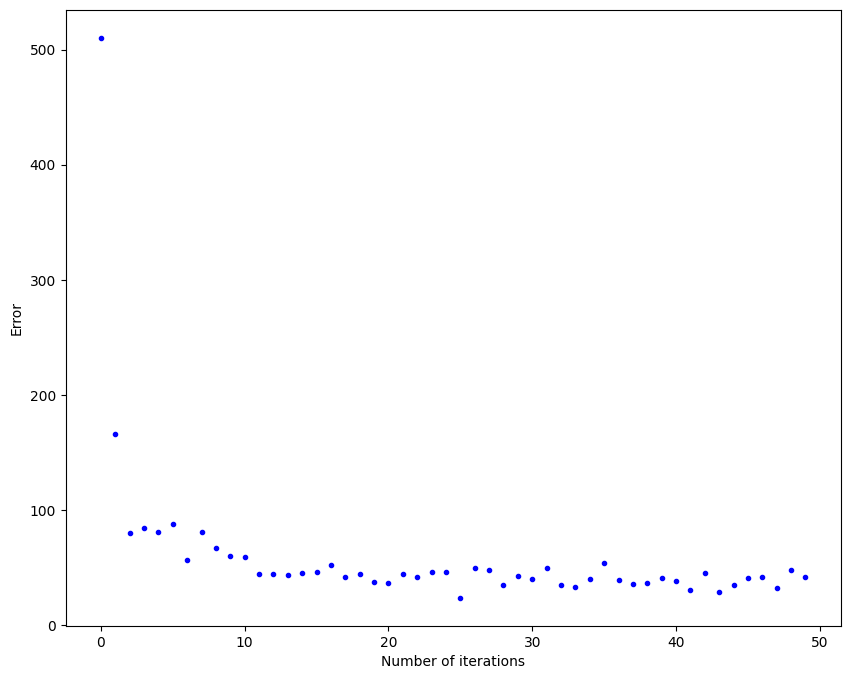

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [14]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [15]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


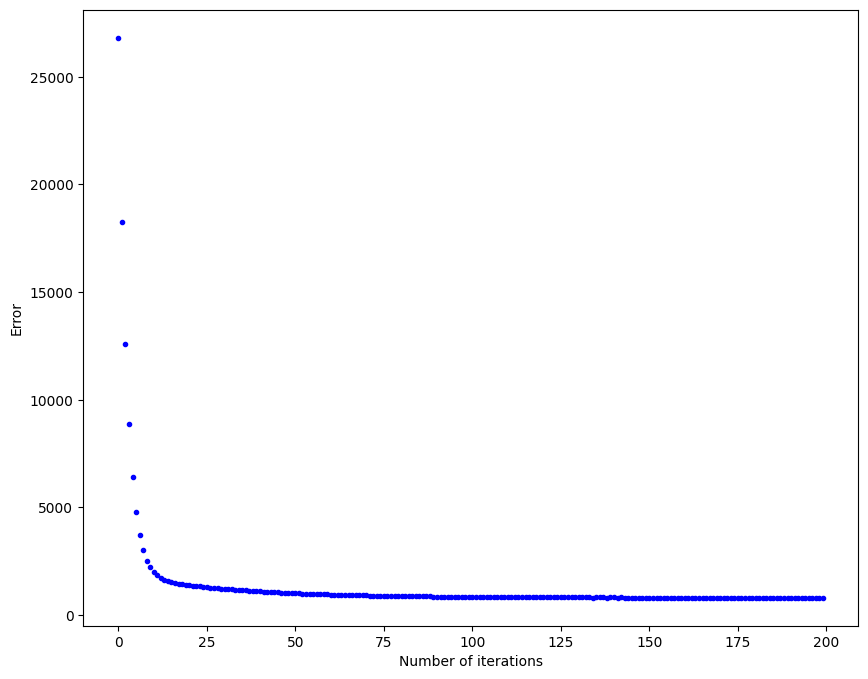

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.

2. Test all the three out on real datasets.

3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

4. Using the provided code for mini-batch gradient descent, experiment with different values of the batch_size parameter (e.g., 10, 30, 50). Describe how changing the batch size affects the convergence behavior and training speed of the algorithm. Does a smaller or larger batch size perform better in terms of both speed and convergence?

5. Take the code for batch gradient descent and stochastic gradient descent. Try adjusting the learning_rate parameter (e.g., 0.001, 0.01, 0.1) for both algorithms. Compare and contrast how changing the learning rate impacts the convergence speed and final error for each algorithm. Does a higher learning rate always lead to faster convergence?

#Answers

nswer 1:

In [17]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
batch_size = [5, 10, 50, 100, 400]

for bs in range(len(batch_size)):

  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size[bs])

  print('Result for batch size of {} is: '.format(batch_size[bs]))

  print('\n \n Final error: {:0.3f}'.format(cost_history[-1]), "\n")

Result for batch size of 5 is: 

 
 Final error: 276.628 

Result for batch size of 10 is: 

 
 Final error: 551.532 

Result for batch size of 50 is: 

 
 Final error: 2759.114 

Result for batch size of 100 is: 

 
 Final error: 5528.207 

Result for batch size of 400 is: 

 
 Final error: 5528.207 



Answer 2:

In [18]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

# Add bias term to features
X_b = np.c_[np.ones((X.shape[0], 1)), X]


# Define gradient descent functions for Batch GD, SGD, and Mini-Batch GD

def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = []

    for it in range(iterations):
        prediction = X.dot(y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history.append(np.mean(np.square(prediction - y)))

    return y_pred, cost_history

def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = []

    for it in range(iterations):
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
            cost_history.append(np.mean(np.square(prediction - y_i)))

    return y_pred, cost_history

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=32):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)

    for it in range(iterations):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i))) / batch_size
            cost_history.append(np.mean(np.square(prediction - y_i)))

    return y_pred, cost_history


# Initialize y_pred with random values
y_pred_init = np.random.randn(X_b.shape[1], 1)

# Set hyperparameters
learning_rate = 0.01
iterations = 100

# Perform Batch GD
y_pred_batch, cost_history_batch = batch_gradient_descent(X_b, y, y_pred_init.copy(), learning_rate, iterations)

# Perform SGD
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y, y_pred_init.copy(), learning_rate, iterations)

# Perform Mini-Batch GD
batch_size = 32
y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_b, y, y_pred_init.copy(), learning_rate, iterations, batch_size)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-18-50b59e2b49a4>:21: RuntimeWarning: overflow encountered in square
  cost_history.append(np.mean(np.square(prediction - y)))
<ipython-input-18-50b59e2b49a4>:20: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
<ipython-input-18-50b59e2b49a4>:36: RuntimeWarning: overflow encountered in square
  cost_history.append(np.mean(np.square(prediction - y_i)))
<ipython-input-18-50b59e2b49a4>:35: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
<ipython-input-18-50b59e2b49a4>:55: RuntimeWarning: overflow encountered in square
  cost_history.append(np.mean(np.square(prediction - y_i)))
<ipython-input-18-50b59e2b49a4>:54: RuntimeWarning: invalid value encounte

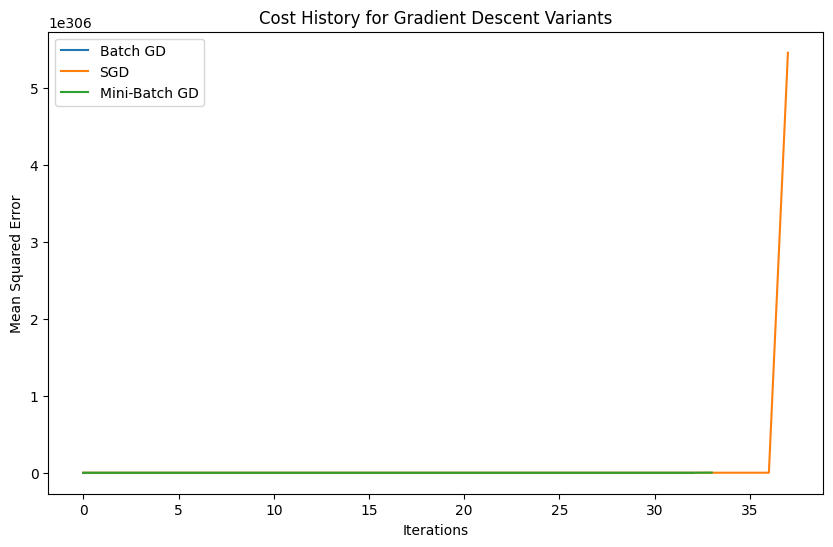

In [19]:
# Plot the cost history for each variant
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history_batch)), cost_history_batch, label='Batch GD')
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD')
plt.plot(range(len(cost_history_minibatch)), cost_history_minibatch, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost History for Gradient Descent Variants')
plt.legend()
plt.show()

Answer 3:

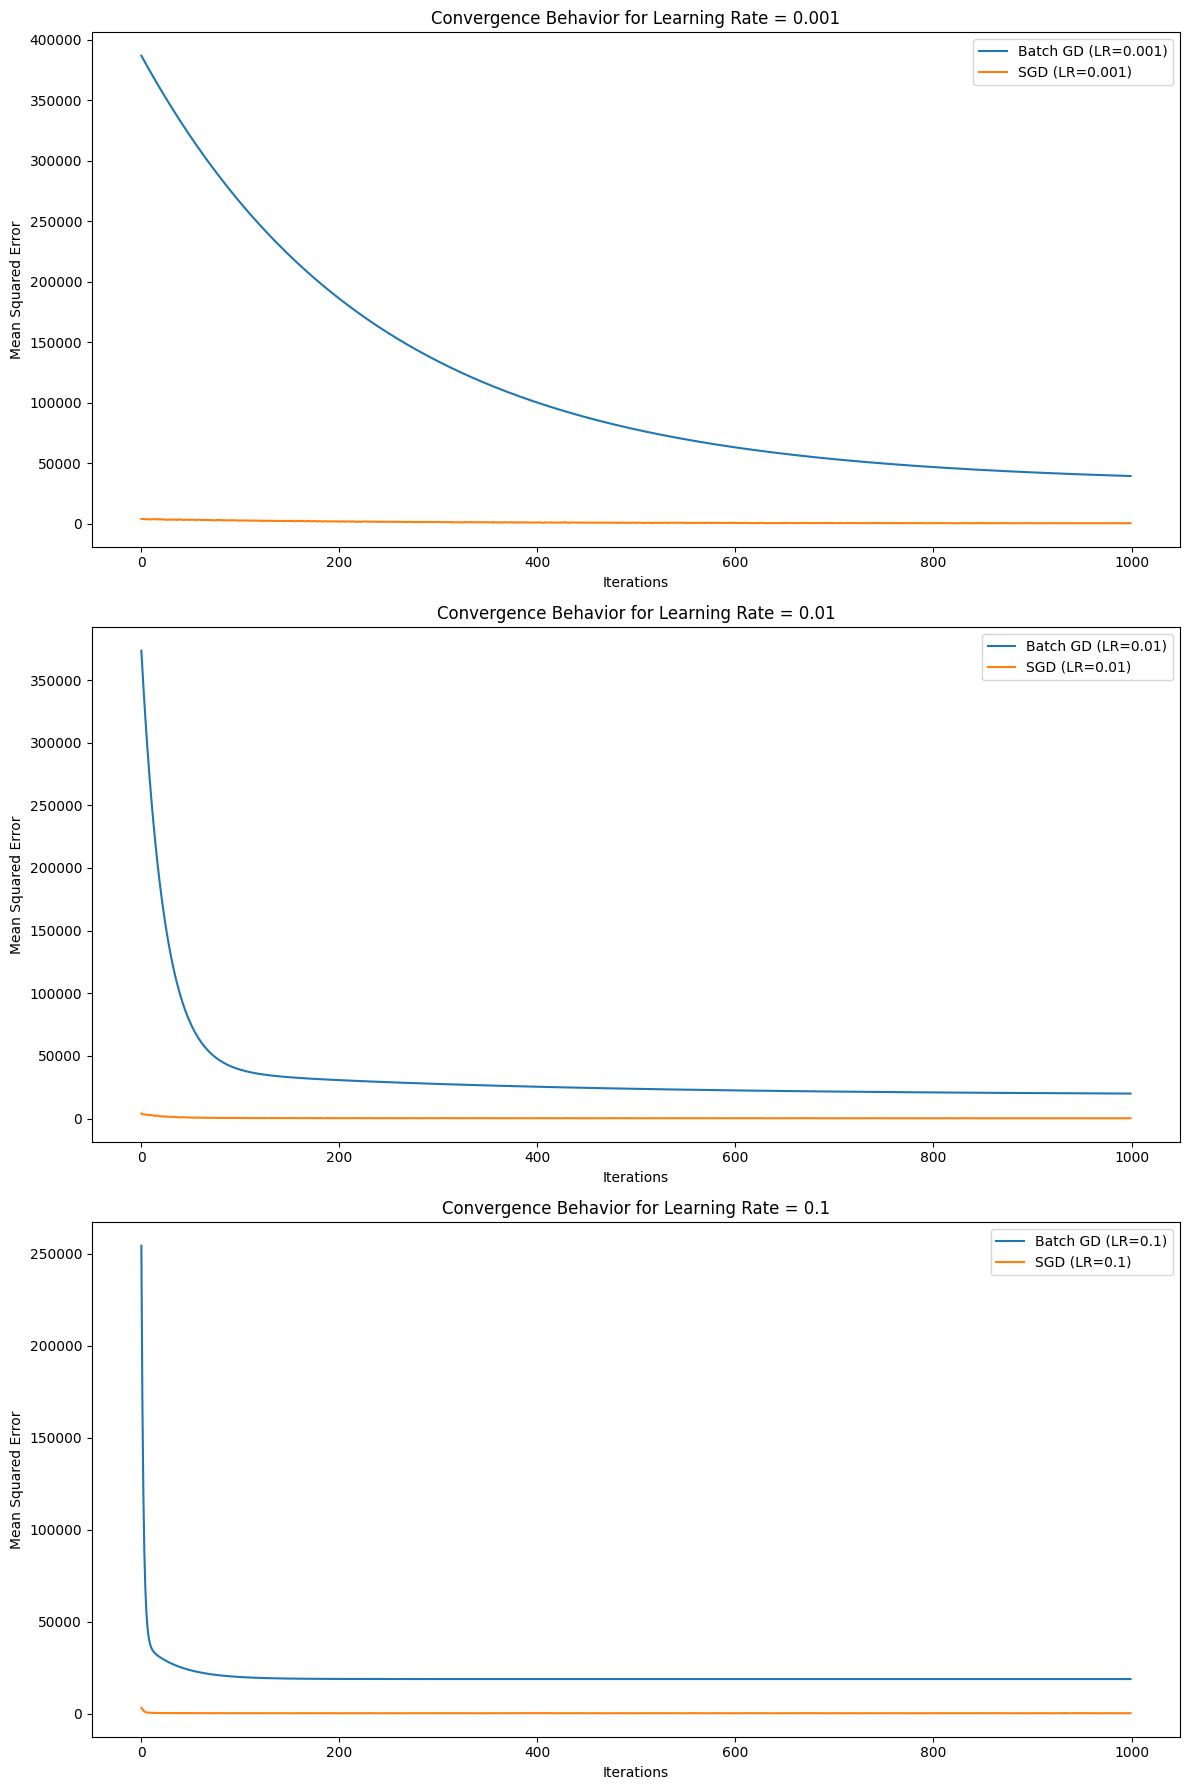

In [37]:
iterations = 1000
batch_size = 32

# Initialize y_pred with random values
y_pred = np.random.randn(X_b.shape[1], 1)
learning_rates = [0.001, 0.01, 0.1]

# Create subplots for each learning rate
fig, axes = plt.subplots(len(learning_rates), 1, figsize=(12, 6 * len(learning_rates)))

for i, lr in enumerate(learning_rates):
  ax = axes[i]

  # Perform Batch GD
  y_pred_batch, cost_history_batch, _ = gradient_descent(X_b, y, y_pred.copy(), lr, iterations)
  ax.plot(range(len(cost_history_batch)), cost_history_batch, label=f'Batch GD (LR={lr})')

  # Perform SGD
  y_pred_sgd, cost_history_sgd = stocashtic_gradient_descent(X_b, y, y_pred.copy(), lr, iterations)
  ax.plot(range(len(cost_history_sgd)), cost_history_sgd, label=f'SGD (LR={lr})')

  ax.set_xlabel('Iterations')
  ax.set_ylabel('Mean Squared Error')
  ax.set_title(f'Convergence Behavior for Learning Rate = {lr}')
  ax.legend()

plt.tight_layout()
plt.show()

Answer 4:

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


y_pred = np.random.randn(2,1)
lr = 0.1
n_iter = 200


batch_size = [5, 10, 16, 30, 32, 50]

for bs in range(len(batch_size)):

 y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size[bs])

 print('Result for batch size of {} is: '.format(batch_size[bs]))

 print('\n \n Final error: {:0.3f}'.format(cost_history[-1]), "\n")

* When you use larger batches of data during training, the final error tends to go up. This happens because with bigger batches, you update the model's parameters less often, making the learning process slower.

* Conversely, if you use smaller batches, the final error tends to be lower. This is because smaller batches lead to more frequent updates of the model's parameters, which helps the model learn faster and reach a better final result in terms of lower error.

Answer 5:

In [29]:
# For Batch_Gradient_Descent

learning_rate = [0.0001, 0.001, 0.01, 0.01]
n_iter = 1000

for lr in range(len(learning_rate)):

    y_pred = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(X), 1)), X]
    y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, learning_rate[lr], n_iter)

    print('Result for the learning_rate  {} is: '.format(learning_rate[lr]))
    print('-------------------------')
    print('Final error: {:0.3f}'.format(cost_history[-1]), "\n")


Result for the learning_rate  0.0001 is: 
-------------------------
Final error: 166656.884 

Result for the learning_rate  0.001 is: 
-------------------------
Final error: 8264.230 

Result for the learning_rate  0.01 is: 
-------------------------
Final error: 5429.282 

Result for the learning_rate  0.01 is: 
-------------------------
Final error: 5395.711 



In [30]:
# For Stochastic_Gradient_Descent

learning_rate = [0.0001, 0.001, 0.01, 0.01]
n_iter = 1000

for lr in range(len(learning_rate)):
  y_pred = np.random.randn(2, 1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

  print('Result for the learning_rate  {} is: '.format(learning_rate[lr]))
  print('-------------------------')
  print('Final error: {:0.3f}'.format(cost_history[-1]), "\n")

Result for the learning_rate  0.0001 is: 
-------------------------
Final error: 1886.043 

Result for the learning_rate  0.001 is: 
-------------------------
Final error: 54.796 

Result for the learning_rate  0.01 is: 
-------------------------
Final error: 46.814 

Result for the learning_rate  0.01 is: 
-------------------------
Final error: 52.898 





**Batch Gradient Descent (BGD):**
- When the learning rate is very small, the algorithm moves very slowly towards the best solution, making it take a long time to finish.
- The final error is high, which means the algorithm hasn't found a good solution within the given time.

- If we use a bigger learning rate, it moves faster and converges quicker.

**Stochastic Gradient Descent (SGD):**
- When the learning rate is small, it starts like BGD, but it usually ends up with a lower error.
- If we use a large learning rate, it's faster but might lead to overfitting, which isn't good.

